In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khan_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Import data
data = pd.read_csv('data/cleaned_data.csv')
data.head()

,tweet,product,emotion
0,wesley i have a g iphone after hrs tweeting a...,iPhone,Negative emotion
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for ipad also they sh...,iPad,Positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on fri sxsw marissa maye...,Google,Positive emotion


In [4]:
# Negative tweet dataframe
neg_data = data.loc[data['emotion'] == 'Negative emotion']

# Positive tweet dataframe
pos_data = data.loc[data['emotion'] == 'Positive emotion']

# Neutral tweet dataframe
no_emo_data = data.loc[data['emotion'] == 'No emotion toward brand or product']

In [5]:
# Function to display Most frequent words and plot them
def most_freq_words(data):
    data_token = data['tweet'].apply(word_tokenize)
    
#   Removes stop words
    stop = stopwords.words('english')
#   Added more words to the stopwords list
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store', 'new', 'austin', 'amp'])
#   Tokenize the data
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

#   Make one list of words form all tweets
    tweet = []
    for t in data_token:
        tweet.extend(t)

#   Lemmatize the words
    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    return plt.figure(figsize=(10,10)), fdist.plot(30), fdist.most_common(25) 

In [6]:
# Function to normalize the data
def normalized(data):
    data_token = data['tweet'].apply(word_tokenize)

    stop = stopwords.words('english')
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store', 'new', 'austin', 'amp'])
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

    tweet = []
    for t in data_token:
        tweet.extend(t)

    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    total_word_count = sum(fdist.values())
    top_25 = fdist.most_common(25)
    print("Word \t\t Normalized Frequency")
    print()
    for word in top_25:
        normalized_frequency = word[1]/total_word_count
        print("{} \t\t {:.4}".format(word[0], normalized_frequency))

# Plot Word Frequency

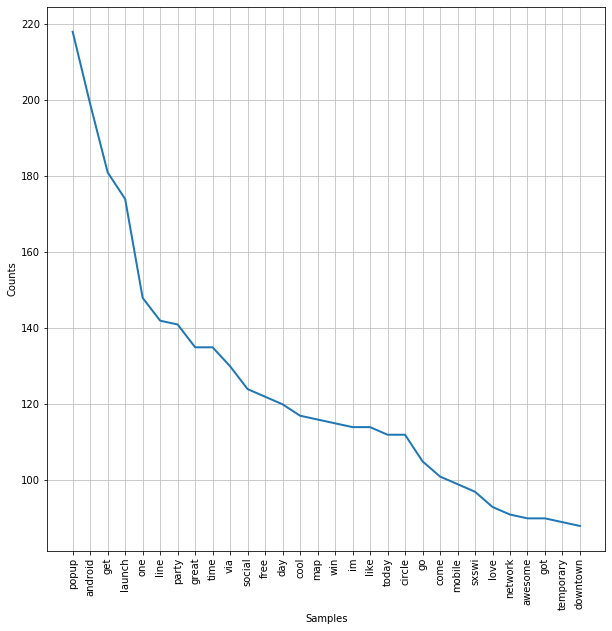

(<Figure size 720x720 with 1 Axes>,
 [('popup', 218),
  ('android', 199),
  ('get', 181),
  ('launch', 174),
  ('one', 148),
  ('line', 142),
  ('party', 141),
  ('great', 135),
  ('time', 135),
  ('via', 130),
  ('social', 124),
  ('free', 122),
  ('day', 120),
  ('cool', 117),
  ('map', 116),
  ('win', 115),
  ('im', 114),
  ('like', 114),
  ('today', 112),
  ('circle', 112),
  ('go', 105),
  ('come', 101),
  ('mobile', 99),
  ('sxswi', 97),
  ('love', 93)])

In [7]:
# Running most frequent words function on Positive words data
most_freq_words(pos_data)

In [8]:
# Running normalize function on Positive words data
normalized(pos_data)

Word 		 Normalized Frequency

popup 		 0.009179
android 		 0.008379
get 		 0.007621
launch 		 0.007326
one 		 0.006231
line 		 0.005979
party 		 0.005937
great 		 0.005684
time 		 0.005684
via 		 0.005473
social 		 0.005221
free 		 0.005137
day 		 0.005052
cool 		 0.004926
map 		 0.004884
win 		 0.004842
im 		 0.0048
like 		 0.0048
today 		 0.004716
circle 		 0.004716
go 		 0.004421
come 		 0.004252
mobile 		 0.004168
sxswi 		 0.004084
love 		 0.003916


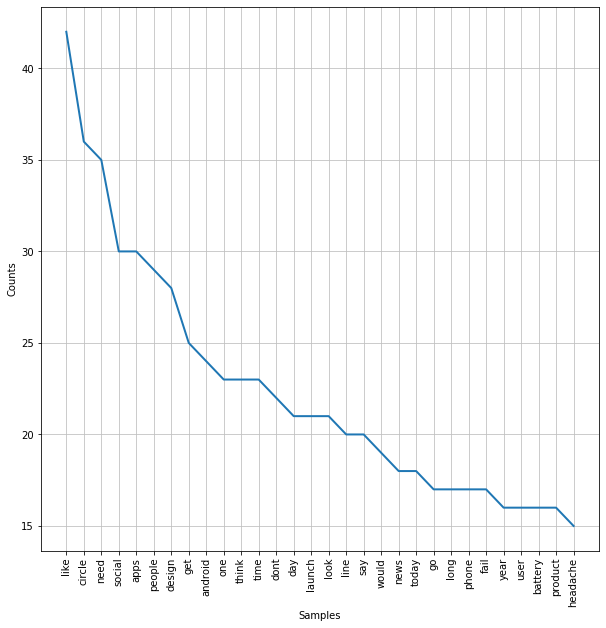

(<Figure size 720x720 with 1 Axes>,
 [('like', 42),
  ('circle', 36),
  ('need', 35),
  ('social', 30),
  ('apps', 30),
  ('people', 29),
  ('design', 28),
  ('get', 25),
  ('android', 24),
  ('one', 23),
  ('think', 23),
  ('time', 23),
  ('dont', 22),
  ('day', 21),
  ('launch', 21),
  ('look', 21),
  ('line', 20),
  ('say', 20),
  ('would', 19),
  ('news', 18),
  ('today', 18),
  ('go', 17),
  ('long', 17),
  ('phone', 17),
  ('fail', 17)])

In [9]:
# Running most frequent words function on Negative words data
most_freq_words(neg_data)

In [10]:
# Running normalize function on Negative words data
normalized(neg_data)

Word 		 Normalized Frequency

like 		 0.008407
circle 		 0.007206
need 		 0.007006
social 		 0.006005
apps 		 0.006005
people 		 0.005805
design 		 0.005604
get 		 0.005004
android 		 0.004804
one 		 0.004604
think 		 0.004604
time 		 0.004604
dont 		 0.004404
day 		 0.004203
launch 		 0.004203
look 		 0.004203
line 		 0.004003
say 		 0.004003
would 		 0.003803
news 		 0.003603
today 		 0.003603
go 		 0.003403
long 		 0.003403
phone 		 0.003403
fail 		 0.003403


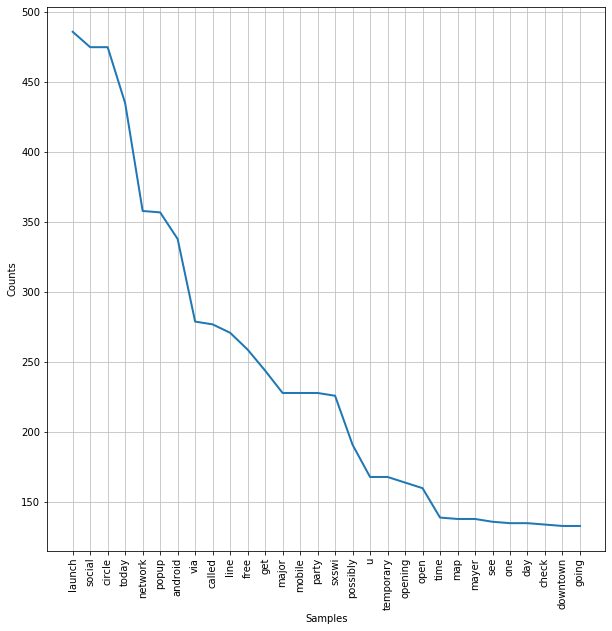

(<Figure size 720x720 with 1 Axes>,
 [('launch', 486),
  ('social', 475),
  ('circle', 475),
  ('today', 435),
  ('network', 358),
  ('popup', 357),
  ('android', 338),
  ('via', 279),
  ('called', 277),
  ('line', 271),
  ('free', 259),
  ('get', 244),
  ('major', 228),
  ('mobile', 228),
  ('party', 228),
  ('sxswi', 226),
  ('possibly', 191),
  ('u', 168),
  ('temporary', 168),
  ('opening', 164),
  ('open', 160),
  ('time', 139),
  ('map', 138),
  ('mayer', 138),
  ('see', 136)])

In [11]:
# Running most frequent words function on Neutral words data
most_freq_words(no_emo_data)

In [12]:
# Running normalize function on Neutral words data
normalized(no_emo_data)

Word 		 Normalized Frequency

launch 		 0.01161
social 		 0.01134
circle 		 0.01134
today 		 0.01039
network 		 0.008549
popup 		 0.008525
android 		 0.008072
via 		 0.006663
called 		 0.006615
line 		 0.006472
free 		 0.006185
get 		 0.005827
major 		 0.005445
mobile 		 0.005445
party 		 0.005445
sxswi 		 0.005397
possibly 		 0.004561
u 		 0.004012
temporary 		 0.004012
opening 		 0.003916
open 		 0.003821
time 		 0.003319
map 		 0.003296
mayer 		 0.003296
see 		 0.003248


# Visualize

In [13]:
# Define function to output frequent words
def most_freq_words_saved(data):
    data_token = data['tweet'].apply(word_tokenize)

    stop = stopwords.words('english')
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store', 'new', 'austin', 'amp'])
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

    tweet = []
    for t in data_token:
        tweet.extend(t)

    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    return fdist

In [14]:
# Save the output of frequent words as variables
pos_words = most_freq_words_saved(pos_data)
neg_words = most_freq_words_saved(neg_data)
neu_words = most_freq_words_saved(no_emo_data)

In [15]:
# Create counts of positive, negative, and neutral with values and words
pos_data_counts = [x[1] for x in pos_words.most_common(25)]
pos_data_words = [x[0] for x in pos_words.most_common(25)]

neg_data_counts = [x[1] for x in neg_words.most_common(25)]
neg_data_words = [x[0] for x in neg_words.most_common(25)]

neu_words_counts = [x[1] for x in neu_words.most_common(25)]
neu_words_words = [x[0] for x in neu_words.most_common(25)]

In [16]:
# Set the color of the bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

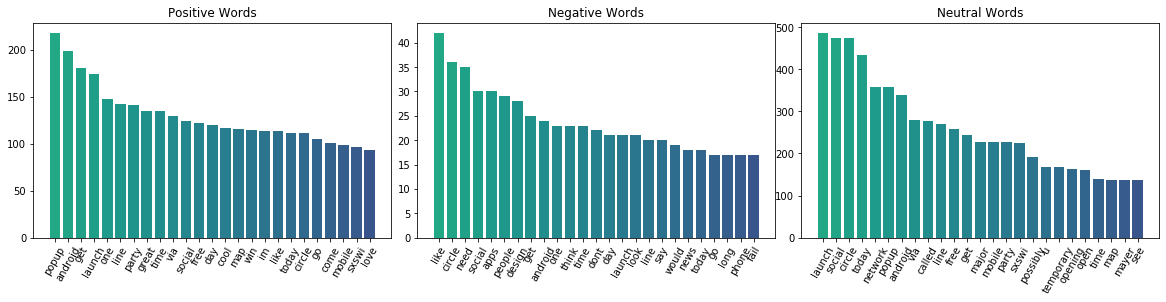

In [17]:
# Plot above data on bar graphs 
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(131)
ax2 = new_figure.add_subplot(132)
ax3 = new_figure.add_subplot(133)

ax.bar(pos_data_words, pos_data_counts, color=color)

ax2.bar(neg_data_words, neg_data_counts, color=color)

ax3.bar(neu_words_words, neu_words_counts, color=color)

ax.title.set_text('Positive Words')
ax2.title.set_text('Negative Words')
ax3.title.set_text('Neutral Words')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# Save the graph
plt.savefig('figures/word_count_bar_graphs.png')

plt.show()

In [18]:
# !pip install wordcloud
# Create dictionaries of the data
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_data_words, pos_data_counts))
neg_dictionary = dict(zip(neg_data_words, neg_data_counts))
neu_dictionary = dict(zip(neu_words_words, neu_words_counts))

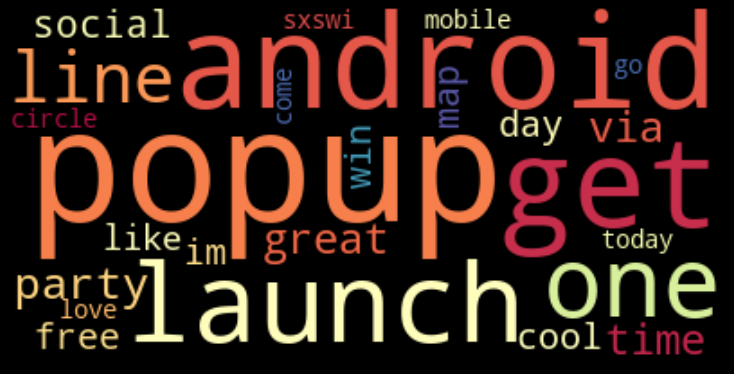

In [29]:
# Plotting words cloud of positive words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/positive_wordcloud.png')

plt.show()

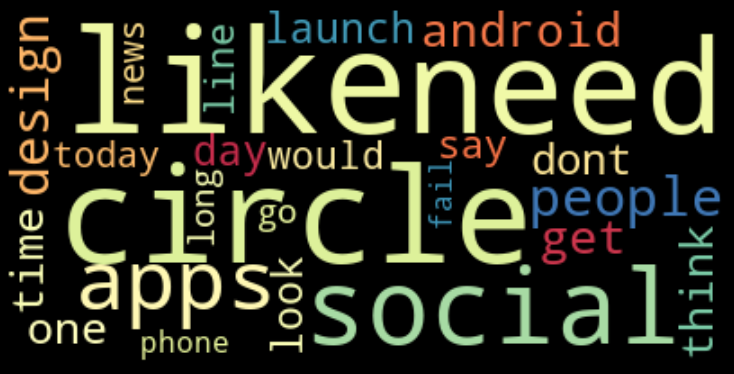

In [30]:
# Plotting words cloud of negative words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/negative_wordcloud.png')

plt.show()

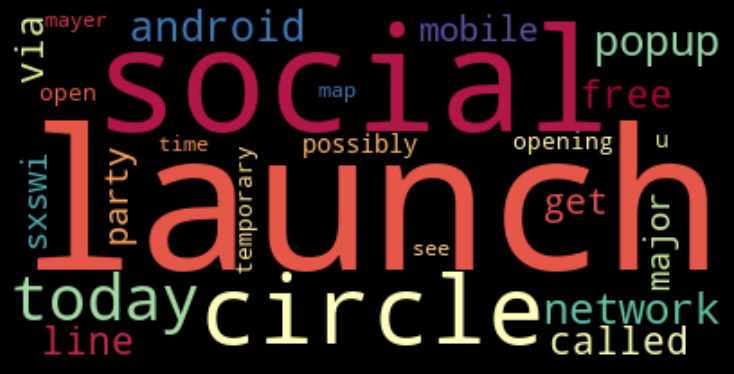

In [31]:
# Plotting words cloud of neutral words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neu_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/neutral_wordcloud.png')

plt.show()